In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import keras
import pandas as pd

# Problem 1: Feature Importance in Iris Classification
We return to the iris dataset from last week. Load it into the notebook and make a pair plot.

array([[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal width (cm)'>,
  

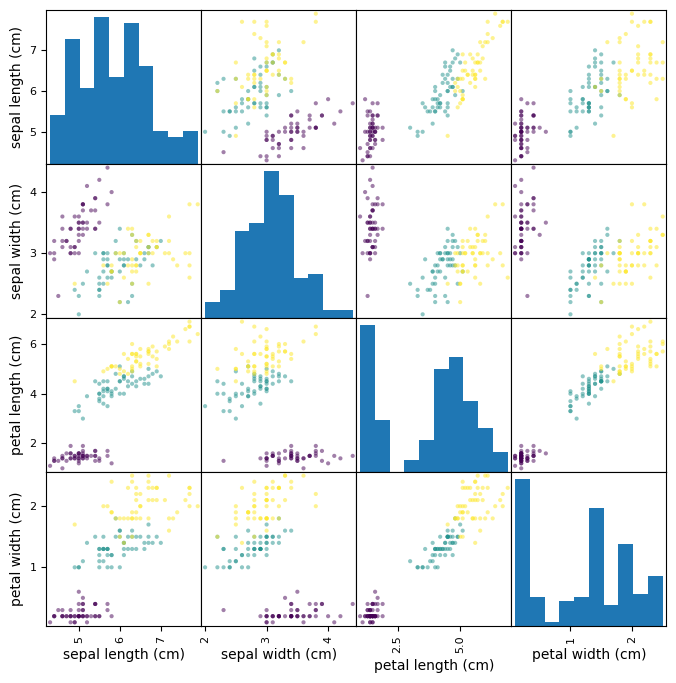

In [11]:
from sklearn import datasets
from pandas.plotting import scatter_matrix
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

pd.plotting.scatter_matrix(iris_df, c = iris.target, figsize=(8, 8))


This time, let's classify it using a random forest. Initialize and train the random forest classifer using cross validation. Repeat the above plot with the predicted classifications and calculate the overall accuracy.

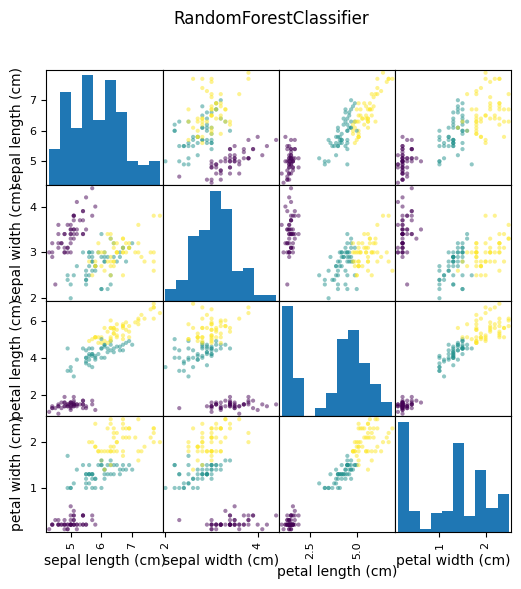

 accuracy score: 0.9666666666666667


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score

ranforst = RandomForestClassifier()

y = iris.target

y_pred = cross_val_predict(ranforst, iris.data, y)

iris_df['ranforst'] = y_pred


pd.plotting.scatter_matrix(iris_df[iris.feature_names], c=iris_df['ranforst'], figsize=(6, 6))
plt.suptitle("RandomForestClassifier")
plt.show()

#accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)
acc_scr = accuracy_score(y, y_pred)
print(' accuracy score:', acc_scr)

Calculate the mean decrease in impurity and the permutation importance for each feature and plot them (*hint:* `plt.barh`). Which feature(s) seem to be the most useful for classification? Does this agree with your intuition from the plots?

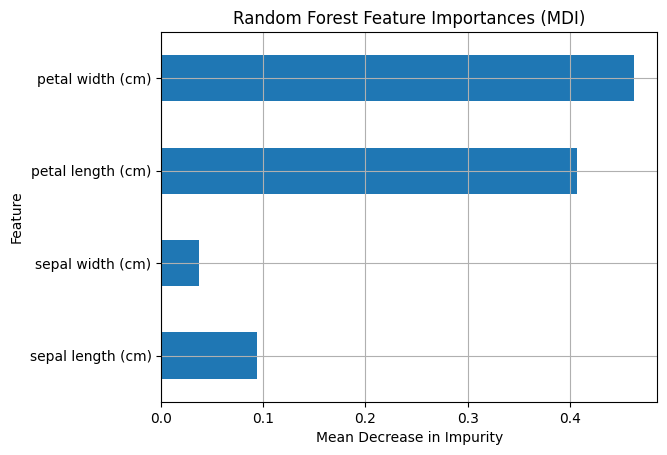

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance


#X, y = make_classification(
#    n_samples=1000,
#    n_features=4,
#    n_informative=3,
#    n_redundant=0,
#    n_repeated=0,
#    n_classes=2,
#    random_state=0,
#    shuffle=False,
#)

X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y)

feature_names = ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]

#here ranforst = RandomForestClassifier(random_state=0)

ranforst.fit(X_train, y_train)

importances = ranforst.feature_importances_

std = np.std([tree.feature_importances_ for tree in ranforst.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)

ax = forest_importances.plot.barh()
ax.set_title("Random Forest Feature Importances (MDI)")
ax.set_yticklabels(feature_names)
ax.set_ylabel("Feature")
ax.set_xlabel("Mean Decrease in Impurity")
plt.grid(True)
fig.tight_layout()
plt.show()


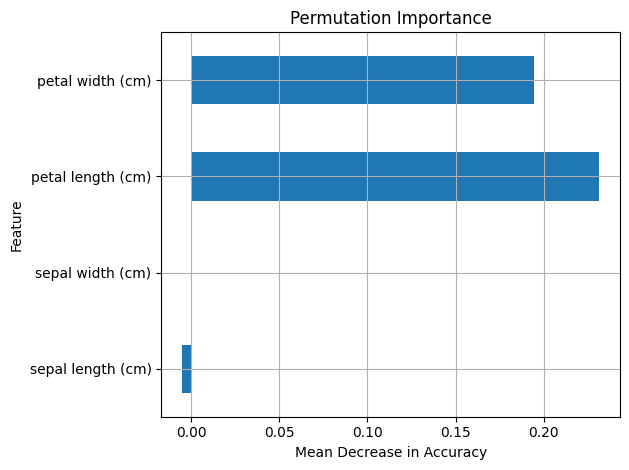

In [59]:
ranforst.fit(X_train, y_train)

perm_result = permutation_importance(ranforst, X_test, y_test, random_state=0)
perm_importances = pd.Series(perm_result.importances_mean, index=feature_names)

fig, ax = plt.subplots()
perm_importances.plot.barh(ax=ax)
ax.set_title("Permutation Importance")
ax.set_xlabel("Mean Decrease in Accuracy")
ax.set_ylabel("Feature")
plt.grid(True)
fig.tight_layout()
plt.show()

The most useful features for classification are petal width and petal length, as they show the highest importance in both the permutation and MDI plots. This agrees with intuition from the scatter matrix, where these features clearly separate the Iris species.

However, note from the pair plot that the petal length and width are strongly correlated. Pick one of these features and remove it from the data set. Then recalculate the accuracy and the feature importance using only 3 features. How do these change, and do the changes make sense given what you know about the data set?

Reduced feature set accuracy: 0.868


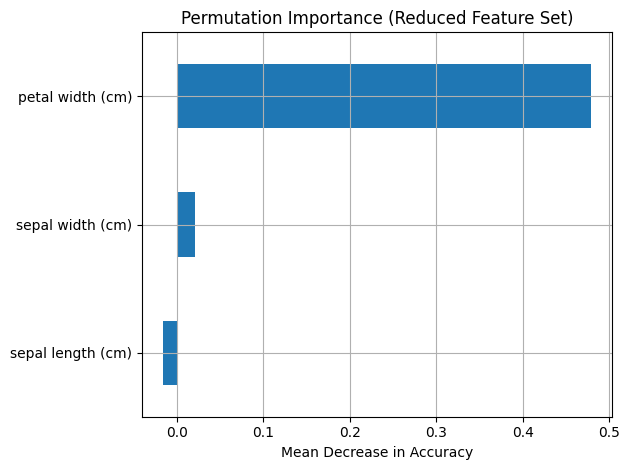

In [62]:
# remove petal length
reduced_name = 'petal length (cm)'
feature_names_reduced = [f for f in feature_names if f != reduced_name]
X_reduced = iris.data[:, [i for i, name in enumerate(feature_names) if name != reduced_name]]

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reduced, y, stratify=y, random_state=42)

ranforst_r = RandomForestClassifier(random_state=0)
ranforst_r.fit(X_train_r, y_train_r)

# accuracy reduced
acc_reduced = ranforst_r.score(X_test_r, y_test_r)
print(f"Reduced feature set accuracy: {acc_reduced:.3f}")

#Permutation Importance reduced
perm_result_r = permutation_importance(ranforst_r, X_test_r, y_test_r, random_state=0)
perm_importances_r = pd.Series(perm_result_r.importances_mean, index=feature_names_reduced)

perm_importances_r.plot.barh()
plt.title("Permutation Importance (Reduced Feature Set)")
plt.xlabel("Mean Decrease in Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# complete
# complete

# complete
# complete
# complete
# complete

*Complete*

# Problem 2: Efficient Classification of a Higher Dimensional Data Set

As much time as we've spent on the iris data set, it is much simpler to understand and easier to classify than almost any data set you will encounter in the real world. Let's instead work with the wine data set, which includes 13 chemical and physical measurements of samples of wine from three different (anonymous) vineyards in Italy. Start by reading it in and plotting it. What do you notice about this data set? Are there any single features that divide the three classes cleanly? Will the ranges of the features cause any problems for our classifiers?

In [ ]:
# complete
# complete
# complete
# complete

*Complete*

In the end, we would like to understand how our classifier works, so let's try to reduce the number of features to something more manageable. Apply a dimensionality reduction technique and decide how many features we can make do with. (This is intentionally very open-ended to make you think about it!) Comment on what you're doing.

In [ ]:
# complete
# complete

# complete
# complete
# complete

# complete
# complete
# complete

# complete
# complete
# complete

# complete
# complete
# complete

Using your newly engineered features, train a support vector machine with cross validation and calculate the accuracy.

In [ ]:
# complete
# complete
# complete

# complete
# complete

# complete
# complete

Lastly, because this is the interpretability notebook, we want to gain some understanding of how this classification procedure actually worked. Make a graph of how your new features relate to the original input features. Based on the graph, which of the original features are most influential in the final classification? Does your answer differ for different classes? How much of the total sample variance does each of the new features explain?

In [ ]:
# complete
# complete
# complete
# complete

# complete
# complete

*Complete*